# Investigating the failure of convergence of neural networks on low dimensional inputs

## 1. Import necessary libraries and define the required classes

In [1]:
%matplotlib notebook

import pandas as pd
import argparse
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import time
import matplotlib
import math
from sklearn import preprocessing
from sklearn.preprocessing import normalize
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import collections
import random
import pickle
torch.set_default_tensor_type('torch.FloatTensor')

In [2]:
#### Multilayer fully connected network with Relu activation.
class LNN(nn.Module):
    def __init__(self,num_feature,num_hidden,nb_layers):
        super(LNN, self, ).__init__()
        ## Inputs:
        # num_feature: int, size of input dimension
        # num_hidden: int, number of hidden units per layer
        # nb_layers: int, number of layers
        
        fc = []
        for i in range(nb_layers):
            if i == 0:
                fc.append((str(i),nn.Linear(num_feature, num_hidden)))
                fc.append((str(i)+'ReLU',nn.ReLU(inplace=True)))
            elif i == nb_layers-1:
                fc.append((str(i),nn.Linear(num_hidden,1)))
            else:
                fc.append((str(i),nn.Linear(num_hidden, num_hidden)))
                fc.append((str(i)+'ReLU',nn.ReLU(inplace=True)))
        self.linear = nn.Sequential(collections.OrderedDict(fc))
        self.log = nn.Sigmoid()

    def forward(self, x):
        # Choose whether or not to use a Sigmoid activation unit at the top of the network
        # to bound output with in (0,1)
#         x = self.log(self.linear(x))
        x = self.linear(x)
        return x

#### Training function: perform one step of accelerated gradient descent (no subsampling)
def train(net,x,y,learning_rate):
    optimizer = optim.SGD(net.parameters(), momentum = 0.9, lr=learning_rate)
    criterion = nn.MSELoss() # Using mean squared loss
    ## zero the parameter gradients
    optimizer.zero_grad()
    ## forward + backward + optimize
    outputs = net(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    ## Print loss
    return loss.item()

## 2. Examples:

### a. Pneumonia age example.

In [3]:
############# Import Data #############
file = 'medis9847c.data' # data file
df = pd.read_table(file,header = None)
val = df.values

# extract the age feature and normalize it to within the range where most activation threshold lies
age = (val[:,0:1]-60)/10 
# extract the labels
y = val[:,-1:]

############# Hyperparameters #############
num_feature = 1 # input dimension
num_epoch = 40000 # number of epoch SGD runs
num_hidden = 2000 # number of hidden units per layer
num_layer = 2 # number of layer
learning_rate = 1e-4 # learning rate

#################### Experiments #######################
x = age
inputs = torch.from_numpy(x).float()
outputs = torch.from_numpy(y).float()
net = LNN(num_feature, num_hidden,num_layer)
train_loss = [None]*num_epoch
for epoch in range(num_epoch):  # loop over the dataset multiple times
    train_loss[epoch] = train(net,inputs,outputs,learning_rate)
    if epoch % 50 == 49:
        print('Training Iteration:',epoch+1)
        print('Training Loss:',train_loss[epoch])

Training Iteration: 50
Training Loss: 0.09828850626945496
Training Iteration: 100
Training Loss: 0.09610185027122498
Training Iteration: 150
Training Loss: 0.0950547382235527
Training Iteration: 200
Training Loss: 0.0945339947938919
Training Iteration: 250
Training Loss: 0.09426116943359375
Training Iteration: 300
Training Loss: 0.09410854429006577
Training Iteration: 350
Training Loss: 0.09401340782642365
Training Iteration: 400
Training Loss: 0.09394972026348114
Training Iteration: 450
Training Loss: 0.09390147775411606
Training Iteration: 500
Training Loss: 0.09386613965034485
Training Iteration: 550
Training Loss: 0.09383487701416016
Training Iteration: 600
Training Loss: 0.09381286054849625
Training Iteration: 650
Training Loss: 0.09379049390554428
Training Iteration: 700
Training Loss: 0.09377028048038483
Training Iteration: 750
Training Loss: 0.09375817328691483
Training Iteration: 800
Training Loss: 0.09374403953552246
Training Iteration: 850
Training Loss: 0.09373247623443604


Training Iteration: 6950
Training Loss: 0.0936114713549614
Training Iteration: 7000
Training Loss: 0.09361172467470169
Training Iteration: 7050
Training Loss: 0.0936100035905838
Training Iteration: 7100
Training Loss: 0.09360933303833008
Training Iteration: 7150
Training Loss: 0.09360876679420471
Training Iteration: 7200
Training Loss: 0.09360811859369278
Training Iteration: 7250
Training Loss: 0.09360875189304352
Training Iteration: 7300
Training Loss: 0.09360787272453308
Training Iteration: 7350
Training Loss: 0.09360659867525101
Training Iteration: 7400
Training Loss: 0.09360743314027786
Training Iteration: 7450
Training Loss: 0.09360779821872711
Training Iteration: 7500
Training Loss: 0.09360621869564056
Training Iteration: 7550
Training Loss: 0.09360586851835251
Training Iteration: 7600
Training Loss: 0.09360506385564804
Training Iteration: 7650
Training Loss: 0.09360496699810028
Training Iteration: 7700
Training Loss: 0.09360425174236298
Training Iteration: 7750
Training Loss: 0.

Training Iteration: 13750
Training Loss: 0.09357289969921112
Training Iteration: 13800
Training Loss: 0.09357199817895889
Training Iteration: 13850
Training Loss: 0.0935719907283783
Training Iteration: 13900
Training Loss: 0.09357050061225891
Training Iteration: 13950
Training Loss: 0.09357038885354996
Training Iteration: 14000
Training Loss: 0.09357047826051712
Training Iteration: 14050
Training Loss: 0.09356975555419922
Training Iteration: 14100
Training Loss: 0.09356891363859177
Training Iteration: 14150
Training Loss: 0.0935678705573082
Training Iteration: 14200
Training Loss: 0.09356724470853806
Training Iteration: 14250
Training Loss: 0.09356783330440521
Training Iteration: 14300
Training Loss: 0.09356752783060074
Training Iteration: 14350
Training Loss: 0.09356757998466492
Training Iteration: 14400
Training Loss: 0.09356654435396194
Training Iteration: 14450
Training Loss: 0.0935664176940918
Training Iteration: 14500
Training Loss: 0.09356733411550522
Training Iteration: 14550
T

Training Iteration: 20500
Training Loss: 0.09354663640260696
Training Iteration: 20550
Training Loss: 0.09354720264673233
Training Iteration: 20600
Training Loss: 0.09354651719331741
Training Iteration: 20650
Training Loss: 0.09354643523693085
Training Iteration: 20700
Training Loss: 0.09354550391435623
Training Iteration: 20750
Training Loss: 0.09354529529809952
Training Iteration: 20800
Training Loss: 0.09354628622531891
Training Iteration: 20850
Training Loss: 0.09354541450738907
Training Iteration: 20900
Training Loss: 0.09354626387357712
Training Iteration: 20950
Training Loss: 0.09354682266712189
Training Iteration: 21000
Training Loss: 0.09354662895202637
Training Iteration: 21050
Training Loss: 0.09354569017887115
Training Iteration: 21100
Training Loss: 0.0935443863272667
Training Iteration: 21150
Training Loss: 0.09354446828365326
Training Iteration: 21200
Training Loss: 0.09354384243488312
Training Iteration: 21250
Training Loss: 0.09354345500469208
Training Iteration: 21300

Training Iteration: 27250
Training Loss: 0.09352734684944153
Training Iteration: 27300
Training Loss: 0.09352642297744751
Training Iteration: 27350
Training Loss: 0.09352613985538483
Training Iteration: 27400
Training Loss: 0.09352664649486542
Training Iteration: 27450
Training Loss: 0.09352630376815796
Training Iteration: 27500
Training Loss: 0.0935264304280281
Training Iteration: 27550
Training Loss: 0.09352662414312363
Training Iteration: 27600
Training Loss: 0.09352638572454453
Training Iteration: 27650
Training Loss: 0.09352564066648483
Training Iteration: 27700
Training Loss: 0.09352525323629379
Training Iteration: 27750
Training Loss: 0.09352526813745499
Training Iteration: 27800
Training Loss: 0.09352487325668335
Training Iteration: 27850
Training Loss: 0.09352526813745499
Training Iteration: 27900
Training Loss: 0.09352525323629379
Training Iteration: 27950
Training Loss: 0.09352587908506393
Training Iteration: 28000
Training Loss: 0.09352611750364304
Training Iteration: 28050

Training Iteration: 34000
Training Loss: 0.09351561963558197
Training Iteration: 34050
Training Loss: 0.09351557493209839
Training Iteration: 34100
Training Loss: 0.09351618587970734
Training Iteration: 34150
Training Loss: 0.09351653605699539
Training Iteration: 34200
Training Loss: 0.09351666271686554
Training Iteration: 34250
Training Loss: 0.09351512044668198
Training Iteration: 34300
Training Loss: 0.09351514279842377
Training Iteration: 34350
Training Loss: 0.09351511299610138
Training Iteration: 34400
Training Loss: 0.09351514279842377
Training Iteration: 34450
Training Loss: 0.0935148149728775
Training Iteration: 34500
Training Loss: 0.09351406246423721
Training Iteration: 34550
Training Loss: 0.09351465106010437
Training Iteration: 34600
Training Loss: 0.0935148075222969
Training Iteration: 34650
Training Loss: 0.0935148149728775
Training Iteration: 34700
Training Loss: 0.09351479262113571
Training Iteration: 34750
Training Loss: 0.0935152992606163
Training Iteration: 34800
Tr

<IPython.core.display.Javascript object>


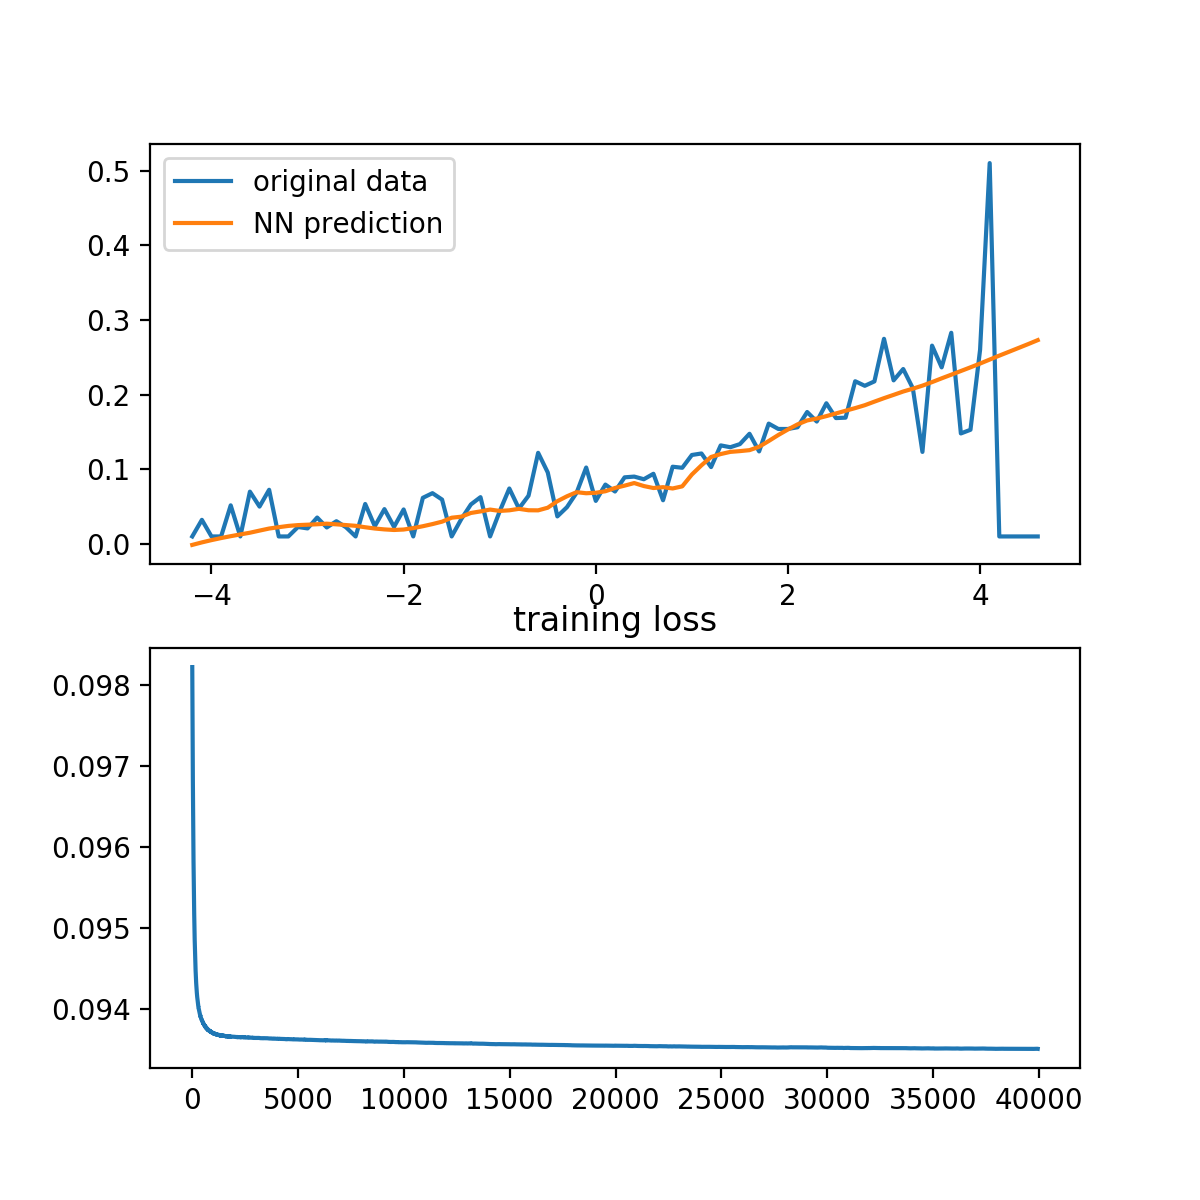

In [4]:
## Plot the results
plt.figure(figsize = (6,6))

plt.subplot(2,1,1)
val = df.values
unique_age = np.unique(age)
h = np.asarray([np.mean(val[np.multiply(age[:,0] >= i-0,age[:,0] <= i+0),-1])+0.01 for i in unique_age]) # the histogram
## The marginalization plot p(y|x), which is the optimal predictor
plt.plot(unique_age,h,label = 'original data')
## The plot of the neural net's prediction
plt.plot(unique_age,net(torch.from_numpy(unique_age[...,np.newaxis]).float()).detach().numpy(),label = 'NN prediction')
plt.legend()

## Plot of training losses vs number of epoches.
plt.subplot(2,1,2)
plt.title('training loss')
plt.plot(train_loss[50:])
plt.show()

### b. 1-dimensional dataset. Random x and y sampled from standard Gaussian. Squared loss used. 
In this example, the global minimum should achieve zero training error.
It seems that the neural net is trapped in some local minimum and fits a smooth function.

In [5]:
############# Hyperparameters#############
num_feature = 1
num_epoch = 1000000
num_hidden = 500
num_layer = 2
learning_rate = 1e-4
#################### Experiments #######################
num_data = 5
x = np.random.randn(num_data,num_feature)
for i in range(num_data):
    x[i,0] = 0.1*i - 0.1*num_data/2
x.sort(axis=0)
y = np.random.rand(num_data,1)
inputs = torch.from_numpy(x).float()
outputs = torch.from_numpy(y).float()
net2 = LNN(num_feature, num_hidden,num_layer)
train_loss2 = []
for epoch in range(num_epoch):  # loop over the dataset multiple times
    train_loss2.append(train(net2,inputs,outputs,learning_rate))
    if epoch % 5000 == 4999:
        print('Training Iteration:',epoch+1)
        print('Training Loss:',train_loss2[-1])

Training Iteration: 5000
Training Loss: 0.07242752611637115
Training Iteration: 10000
Training Loss: 0.06980308890342712
Training Iteration: 15000
Training Loss: 0.06843391060829163
Training Iteration: 20000
Training Loss: 0.06714524328708649
Training Iteration: 25000
Training Loss: 0.06588571518659592
Training Iteration: 30000
Training Loss: 0.06463891267776489
Training Iteration: 35000
Training Loss: 0.06340692937374115
Training Iteration: 40000
Training Loss: 0.06218086555600166
Training Iteration: 45000
Training Loss: 0.0609586238861084
Training Iteration: 50000
Training Loss: 0.059734344482421875
Training Iteration: 55000
Training Loss: 0.05850159004330635
Training Iteration: 60000
Training Loss: 0.05726361274719238
Training Iteration: 65000
Training Loss: 0.05601244047284126
Training Iteration: 70000
Training Loss: 0.054804861545562744
Training Iteration: 75000
Training Loss: 0.053635429590940475
Training Iteration: 80000
Training Loss: 0.052480172365903854
Training Iteration: 85

Training Iteration: 665000
Training Loss: 0.006207321770489216
Training Iteration: 670000
Training Loss: 0.006157250143587589
Training Iteration: 675000
Training Loss: 0.0061085643246769905
Training Iteration: 680000
Training Loss: 0.006061346270143986
Training Iteration: 685000
Training Loss: 0.006015211343765259
Training Iteration: 690000
Training Loss: 0.005970809143036604
Training Iteration: 695000
Training Loss: 0.005927198566496372
Training Iteration: 700000
Training Loss: 0.005884915124624968
Training Iteration: 705000
Training Loss: 0.0058440412394702435
Training Iteration: 710000
Training Loss: 0.005804454907774925
Training Iteration: 715000
Training Loss: 0.005766115617007017
Training Iteration: 720000
Training Loss: 0.0057286834344267845
Training Iteration: 725000
Training Loss: 0.005692547652870417
Training Iteration: 730000
Training Loss: 0.005657332018017769
Training Iteration: 735000
Training Loss: 0.005623136181384325
Training Iteration: 740000
Training Loss: 0.00558995

<IPython.core.display.Javascript object>


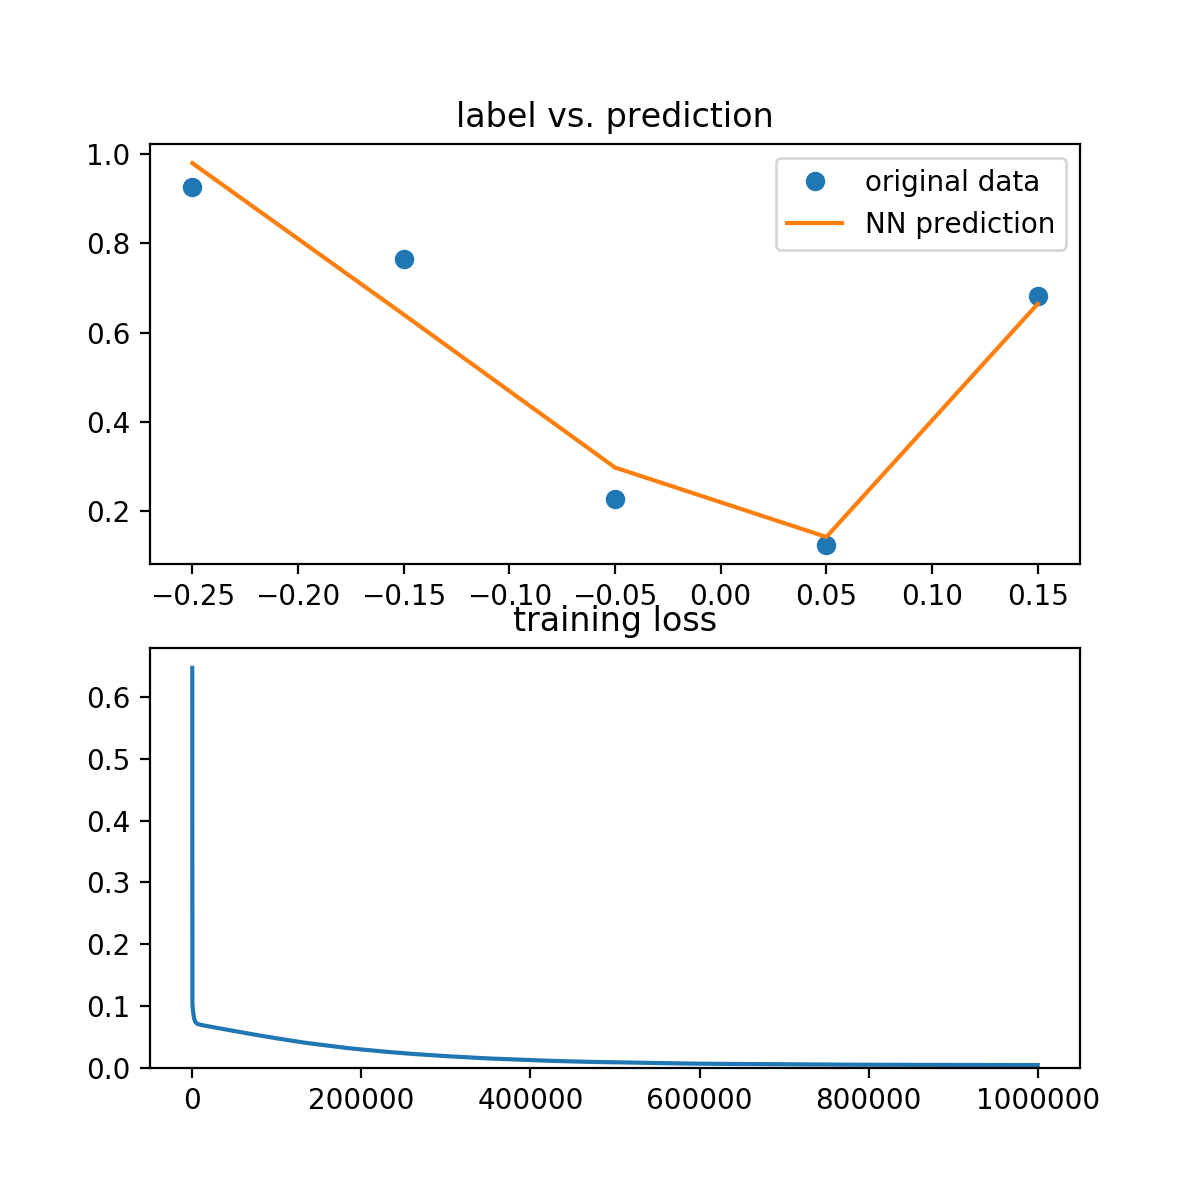

In [8]:
plt.figure(figsize = (6,6))
plt.subplot(2,1,1)
plt.title('label vs. prediction')
plt.plot(x,y,'o',label = 'original data')
plt.plot(x,net2(inputs).detach().numpy(),label = 'NN prediction')
plt.legend()
plt.subplot(2,1,2)
plt.title('training loss')
plt.plot(train_loss2)
plt.ylim(ymin=0)
plt.show()

<IPython.core.display.Javascript object>


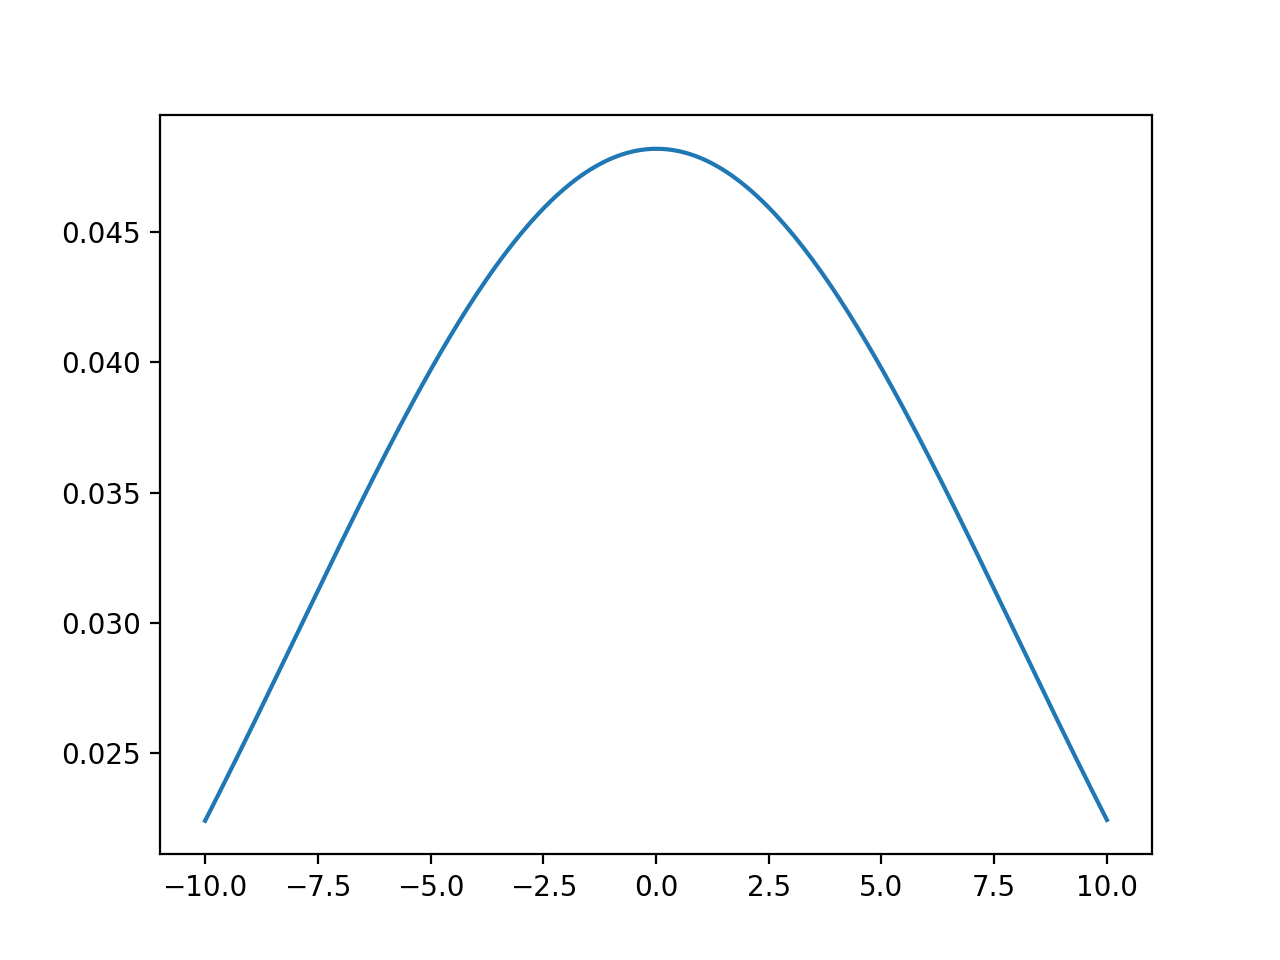

In [9]:
## Plot the distribution of activation thresholds
from scipy.stats import gaussian_kde
activations = np.divide(net.linear[0].bias.data.detach().numpy(),net.linear[0].weight.data.detach().numpy().T[0])
density = gaussian_kde(activations)
plt.figure()
xs = np.linspace(-10,10,200)
plt.plot(xs,density(xs))
plt.show()